# CNN on CIFAR
---

In [1]:
import matplotlib.pyplot as plt
plt.rc("image", cmap="binary")
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow.keras as tfk
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Convolution2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import inception_v3,efficientnet

## CIFAR

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


[7]


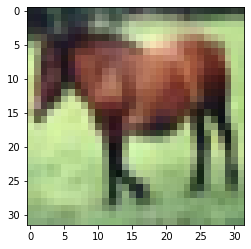

In [5]:
plt.imshow(x_train[7])
print(y_train[7])

## Deep Convolutional Neural Networks

In [6]:
# optimizer
my_adam = Adam()

In [7]:
n_input = 32*32 # MNIST data input (img shape: 28*28)
n_classes = 10 # MNIST total classes (0-9 digits)

In [8]:
# create model
convnet = Sequential()
convnet.add(Convolution2D(30, (5, 5), padding='valid', input_shape=(32, 32, 3), activation='relu'))
convnet.add(MaxPooling2D(pool_size=(2, 2)))
convnet.add(Convolution2D(15, (3, 3), activation='relu'))
convnet.add(MaxPooling2D(pool_size=(2, 2)))
convnet.add(Dropout(0.2))
convnet.add(Flatten())
convnet.add(Dense(128, activation='relu'))
convnet.add(Dense(50, activation='relu'))
convnet.add(Dense(n_classes, activation='softmax'))
# Compile model
convnet.compile(loss='categorical_crossentropy', optimizer=my_adam, metrics=['accuracy'])

In [9]:
convnet.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 30)        2280      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 30)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 15)        4065      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 15)          0         
_________________________________________________________________
dropout (Dropout)            (None, 6, 6, 15)          0         
_________________________________________________________________
flatten (Flatten)            (None, 540)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               6

---
# Let me break down some of those numbers
First Convolution: $(\underbrace{5\cdot 5}_{\text{filter-size}} \cdot\underbrace{3}_{\text{channels}}+\underbrace{1}_{\text{bias}})\cdot\underbrace{30}_{\text{filter}} = 2280$

First Pooling: dimensione $(\cdot,14,14,30)$ --> $14=\frac{\underbrace{28}_{32-\underbrace{5}_{\text{filter-size}}+1}}{\underbrace{2}_{\text{pool-size}}}$

Second Convolution: $(\underbrace{3\cdot 3}_{\text{filter-size}}\cdot \underbrace{30}_{\text{previous filters}}+\underbrace{1}_{\text{bias}})\cdot\underbrace{15}_{\text{filtri}} = 4065$

Flatten: dimensions $(\cdot, 540)$ --> $540=(6\cdot 6\cdot 15)$

First Dense: dimensions $(\cdot, 128)$ --> 
             number of parameters $69248$ --> $(540+1)\cdot 128$

---

## Convnet on CIFAR

In [10]:
# Preprocessing
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

mx = np.max(x_train)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= mx
x_test /= mx

n_classes = 10 # CIFAR total classes

y_train = to_categorical(y_train, n_classes)
y_test = to_categorical(y_test, n_classes)

In [11]:
# Fit the model
convnet_hist = convnet.fit(x_train,
                           y_train,
                           validation_data=(x_test, y_test),
                           epochs=5,
                           batch_size=100,
                           verbose=1
                          )

Epoch 1/5
500/500 [==============================] - 32s 64ms/step - loss: 1.6745 - accuracy: 0.3903 - val_loss: 1.4099 - val_accuracy: 0.4931
Epoch 2/5
500/500 [==============================] - 32s 64ms/step - loss: 1.3828 - accuracy: 0.5012 - val_loss: 1.2636 - val_accuracy: 0.5532
Epoch 3/5
500/500 [==============================] - 32s 65ms/step - loss: 1.2548 - accuracy: 0.5516 - val_loss: 1.1627 - val_accuracy: 0.5869
Epoch 4/5
500/500 [==============================] - 33s 66ms/step - loss: 1.1597 - accuracy: 0.5885 - val_loss: 1.0803 - val_accuracy: 0.6167
Epoch 5/5
500/500 [==============================] - 32s 65ms/step - loss: 1.0891 - accuracy: 0.6135 - val_loss: 1.0477 - val_accuracy: 0.6360


In [12]:
def plot_curves(hist):
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.legend(['Training', 'Validation'])

    plt.subplot(1,2,2)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.legend(['Training', 'Validation'], loc='lower right')   

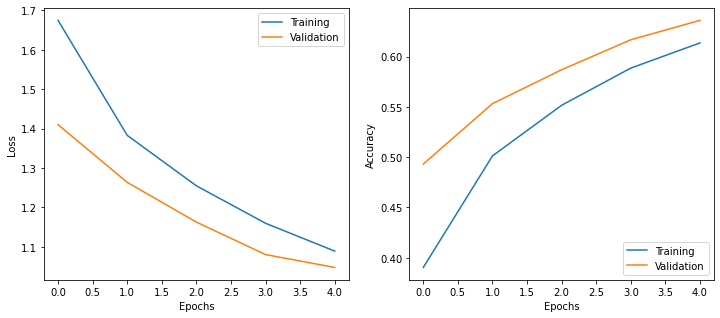

In [13]:
plot_curves(convnet_hist)

# Pretrained models: EfficientNet

Many Deep Neural Networks models have been trained on the [ImageNet dataset](http://www.image-net.org/). The training of such network architectures might take days or weeks to finish, but the weights can be shared after the training procedure.

For example, in Keras we can find the implementation of Google EfficientNetB7 model and load the weights that have been produced after training in the ImageNet dataset.

In [14]:
def load_display_convert(fname):
    img = load_img(fname).resize((600,600))
    plt.imshow(img)
    img = np.expand_dims(np.array(img), axis=0)
    img = efficientnet.preprocess_input(img)
    return img

In [15]:
pretrained_model = efficientnet.EfficientNetB7(include_top=True, weights='imagenet')
# include_top lets you select if you want the final dense layers or not.

In [16]:
pretrained_model.summary()

Model: "efficientnetb7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 600, 600, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 600, 600, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 600, 600, 3)  7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 601, 601, 3)  0           normalization[0][0]              
_____________________________________________________________________________________

__________________________________________________________________________________________________
block6d_se_reshape (Reshape)    (None, 1, 1, 2304)   0           block6d_se_squeeze[0][0]         
__________________________________________________________________________________________________
block6d_se_reduce (Conv2D)      (None, 1, 1, 96)     221280      block6d_se_reshape[0][0]         
__________________________________________________________________________________________________
block6d_se_expand (Conv2D)      (None, 1, 1, 2304)   223488      block6d_se_reduce[0][0]          
__________________________________________________________________________________________________
block6d_se_excite (Multiply)    (None, 19, 19, 2304) 0           block6d_activation[0][0]         
                                                                 block6d_se_expand[0][0]          
__________________________________________________________________________________________________
block6d_pr

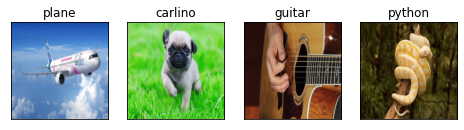

In [17]:
path = "./data/"
obj = ['plane.jpg', 'carlino.jpg', 'guitar.jpg', 'python.jpg']

plt.rc("image", cmap="binary")
plt.figure(figsize=(8,4))
for i in range(len(obj)):
    plt.subplot(1,4,i+1)
    load_display_convert(path+obj[i])
    plt.title(obj[i].replace('.jpg', ''))
    plt.xticks(())
    plt.yticks(())

plane [('n02690373', 'airliner', 0.81506735), ('n04592741', 'wing', 0.027232725), ('n04552348', 'warplane', 0.0032212767), ('n02692877', 'airship', 0.0016175297), ('n04266014', 'space_shuttle', 0.0011325778)]

carlino [('n02110958', 'pug', 0.59662634), ('n02112706', 'Brabancon_griffon', 0.072006345), ('n02108915', 'French_bulldog', 0.027662225), ('n02085620', 'Chihuahua', 0.0070244875), ('n02086079', 'Pekinese', 0.005393826)]

guitar [('n02676566', 'acoustic_guitar', 0.6556411), ('n03929660', 'pick', 0.13518672), ('n03494278', 'harmonica', 0.0026406124), ('n02787622', 'banjo', 0.0022453275), ('n03272010', 'electric_guitar', 0.0021860027)]

python [('n01753488', 'horned_viper', 0.38571686), ('n01756291', 'sidewinder', 0.21162353), ('n01744401', 'rock_python', 0.18549004), ('n01748264', 'Indian_cobra', 0.029882507), ('n01694178', 'African_chameleon', 0.019311609)]



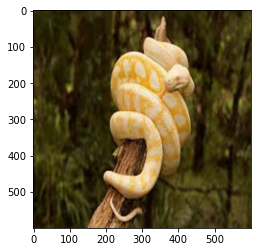

In [18]:
for i in range(len(obj)):
    preds = pretrained_model.predict(load_display_convert(path+obj[i]))
    print(obj[i].replace('.jpg', ''), efficientnet.decode_predictions(preds)[0])
    print()


---
# Another pretrained model: InceptionV3

In [19]:
pretrained_model_v3 = inception_v3.InceptionV3()

plane [('n02690373', 'airliner', 0.9254419), ('n04592741', 'wing', 0.011925055), ('n04552348', 'warplane', 0.0008503284), ('n02701002', 'ambulance', 0.0006478817), ('n04266014', 'space_shuttle', 0.00059257797)]

carlino [('n02110958', 'pug', 0.84108317), ('n02112706', 'Brabancon_griffon', 0.022532519), ('n02108915', 'French_bulldog', 0.019844707), ('n02096585', 'Boston_bull', 0.004616801), ('n02086079', 'Pekinese', 0.002617345)]

guitar [('n02676566', 'acoustic_guitar', 0.9626755), ('n03929660', 'pick', 0.010918856), ('n03272010', 'electric_guitar', 0.0056774565), ('n02787622', 'banjo', 0.0015910267), ('n02843684', 'birdhouse', 0.0003164886)]

python [('n01739381', 'vine_snake', 0.26172614), ('n01749939', 'green_mamba', 0.09681513), ('n01753488', 'horned_viper', 0.08851012), ('n01740131', 'night_snake', 0.059228033), ('n01694178', 'African_chameleon', 0.0548002)]



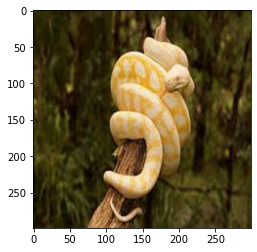

In [20]:
# since we have a different input size for this model, let me re-define this function
def load_display_convert(fname):
    img = load_img(fname).resize((299,299))
    plt.imshow(img)
    img = np.expand_dims(np.array(img), axis=0)
    img = inception_v3.preprocess_input(img)
    return img

path = "./data/"
obj = ['plane.jpg', 'carlino.jpg', 'guitar.jpg', 'python.jpg']

for i in range(len(obj)):
    preds = pretrained_model_v3.predict(load_display_convert(path+obj[i]))
    print(obj[i].replace('.jpg', ''), efficientnet.decode_predictions(preds)[0])
    print()

## Same thing, compact version

Here, we create a function v3_classify() that takes a file name, loads an image with that name, preprocesses it, uses an inception_v3 pretrained model to classify it, and plots the image with a caption containing the highest scoring class.

In [21]:
pretrained_model = inception_v3.InceptionV3()

In [22]:
def v3_classify(pretrained_model, file_name):
    img = load_img(file_name).resize((299, 299))
    np_img = np.expand_dims(np.array(img), axis=0)
    np_img = inception_v3.preprocess_input(np_img)
    raw_prediction = pretrained_model.predict(np_img)
    prediction = inception_v3.decode_predictions(raw_prediction, top=1)
    plt.imshow(img)
    plt.title(prediction[0][0][1])
    plt.xticks([])
    plt.yticks([])
    return prediction

[[('n02676566', 'acoustic_guitar', 0.9626755)]]

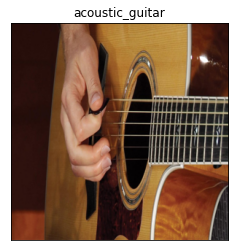

In [23]:
v3_classify(pretrained_model, './data/guitar.jpg')

### Out of curiosity, we look at what effect the pre-processing has on images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


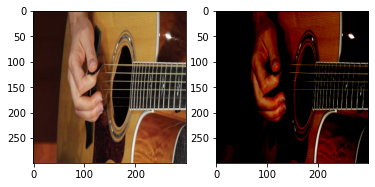

In [24]:
img = load_img('./data/guitar.jpg').resize((299, 299))
np_img = inception_v3.preprocess_input(np.array(img))

plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(np_img)